In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
import numpy as np
import matplotlib.pylab as plt
import corner as cn
np.random.seed(42)

In [2]:
# Working in SI units, because I'm an idiot.
kmps = 1.e3 # km/s in m/s
Vsquared = 220. * 220. * kmps * kmps # (220 km/s)^2 in (m / s)^2
def potential(position, amplitude=Vsquared):
    assert position.shape == (3, )
    r = np.sqrt(np.sum(position * position))
    return amplitude * np.log(r)
def acceleration(position, amplitude=Vsquared):
    assert position.shape == (3, )
    r2 = np.sum(position * position)
    return -1. * amplitude * position / r2

In [3]:
# Some time and length conventions
yr = 3.154e7 # 1 yr in s
tmax = 1.e9 * yr # 1 Gyr in s ; total integration time per orbit
deltat = 1.e6 * yr # 0.001 Gyr in s ; default integration step size
pc = 3.0857e16 # 1 pc in m
kpc = 1000. * pc

In [4]:
velocity = 100. * kmps * np.random.normal(size=3)
position = 100. * kpc * np.random.normal(size=3)
print(position, velocity)

[  4.69961323e+21  -7.22527068e+20  -7.22476408e+20] [ 49671.41530112 -13826.43011712  64768.85381007]


In [5]:
def integrate(x, v, amplitude=Vsquared, stepsize=deltat, duration=tmax):
    xn = 1. * x
    vnhalf = 1. * v - 0.5 * stepsize * acceleration(xn, amplitude=amplitude)
    nsteps = int(tmax / deltat)
    xs = np.zeros((nsteps, 3))
    vs = np.zeros((nsteps, 3))
    for n in range(nsteps):
        dv = stepsize * acceleration(xn, amplitude=amplitude)
        xs[n] = xn
        vs[n] = vnhalf + 0.5 * dv
        vnhalf += dv
        xn += stepsize * vnhalf
    return xs, vs

In [6]:
xs, vs = integrate(position, velocity)
Xs = np.hstack((xs, vs))
Xs.shape

(1000, 6)

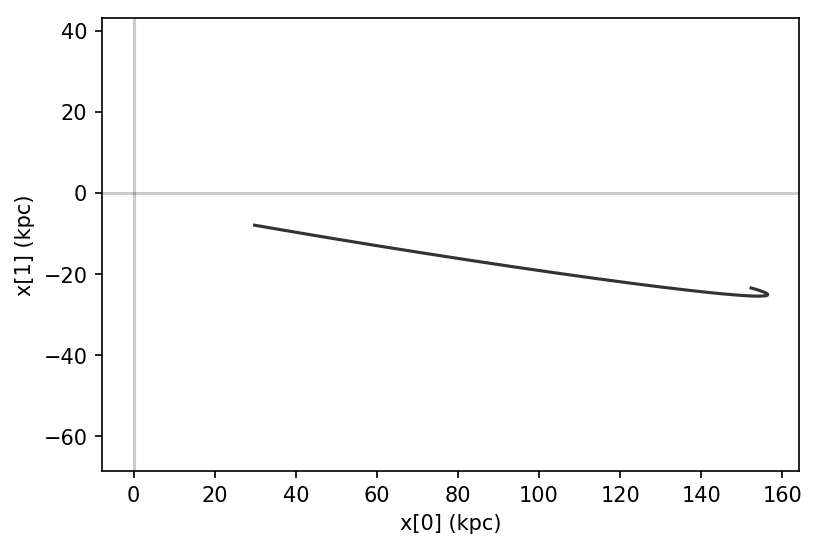

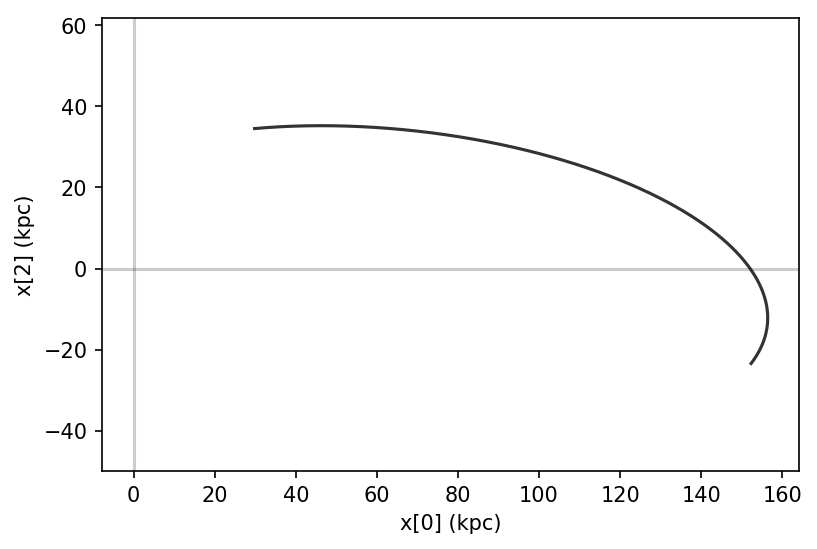

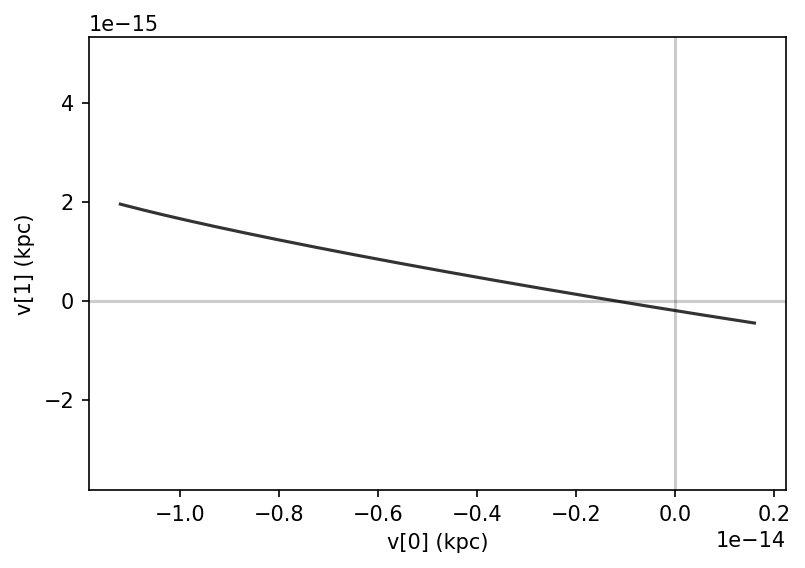

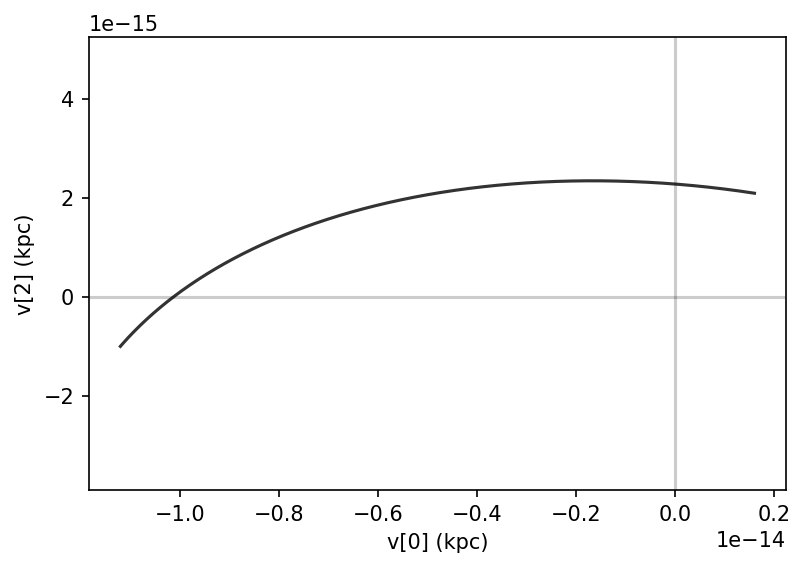

NameError: name 'f' is not defined

In [7]:
for ind in range(2):
    plt.clf()
    plt.plot(xs[:,0] / kpc, xs[:,ind+1] / kpc, "k-", alpha=0.8)
    plt.axhline(0., color="k", alpha=0.2)
    plt.axvline(0., color="k", alpha=0.2)
    plt.axis("equal")
    plt.xlabel("x[{}] (kpc)".format(0))
    plt.ylabel("x[{}] (kpc)".format(ind+1))
    plt.show()
for ind in range(2):
    plt.clf()
    plt.plot(vs[:,0] / kpc, vs[:,ind+1] / kpc, "k-", alpha=0.8)
    plt.axhline(0., color="k", alpha=0.2)
    plt.axvline(0., color="k", alpha=0.2)
    plt.axis("equal")
    plt.xlabel("v[{}] (kpc)".format(0))
    plt.ylabel("v[{}] (kpc)".format(ind+1))
    plt.show()

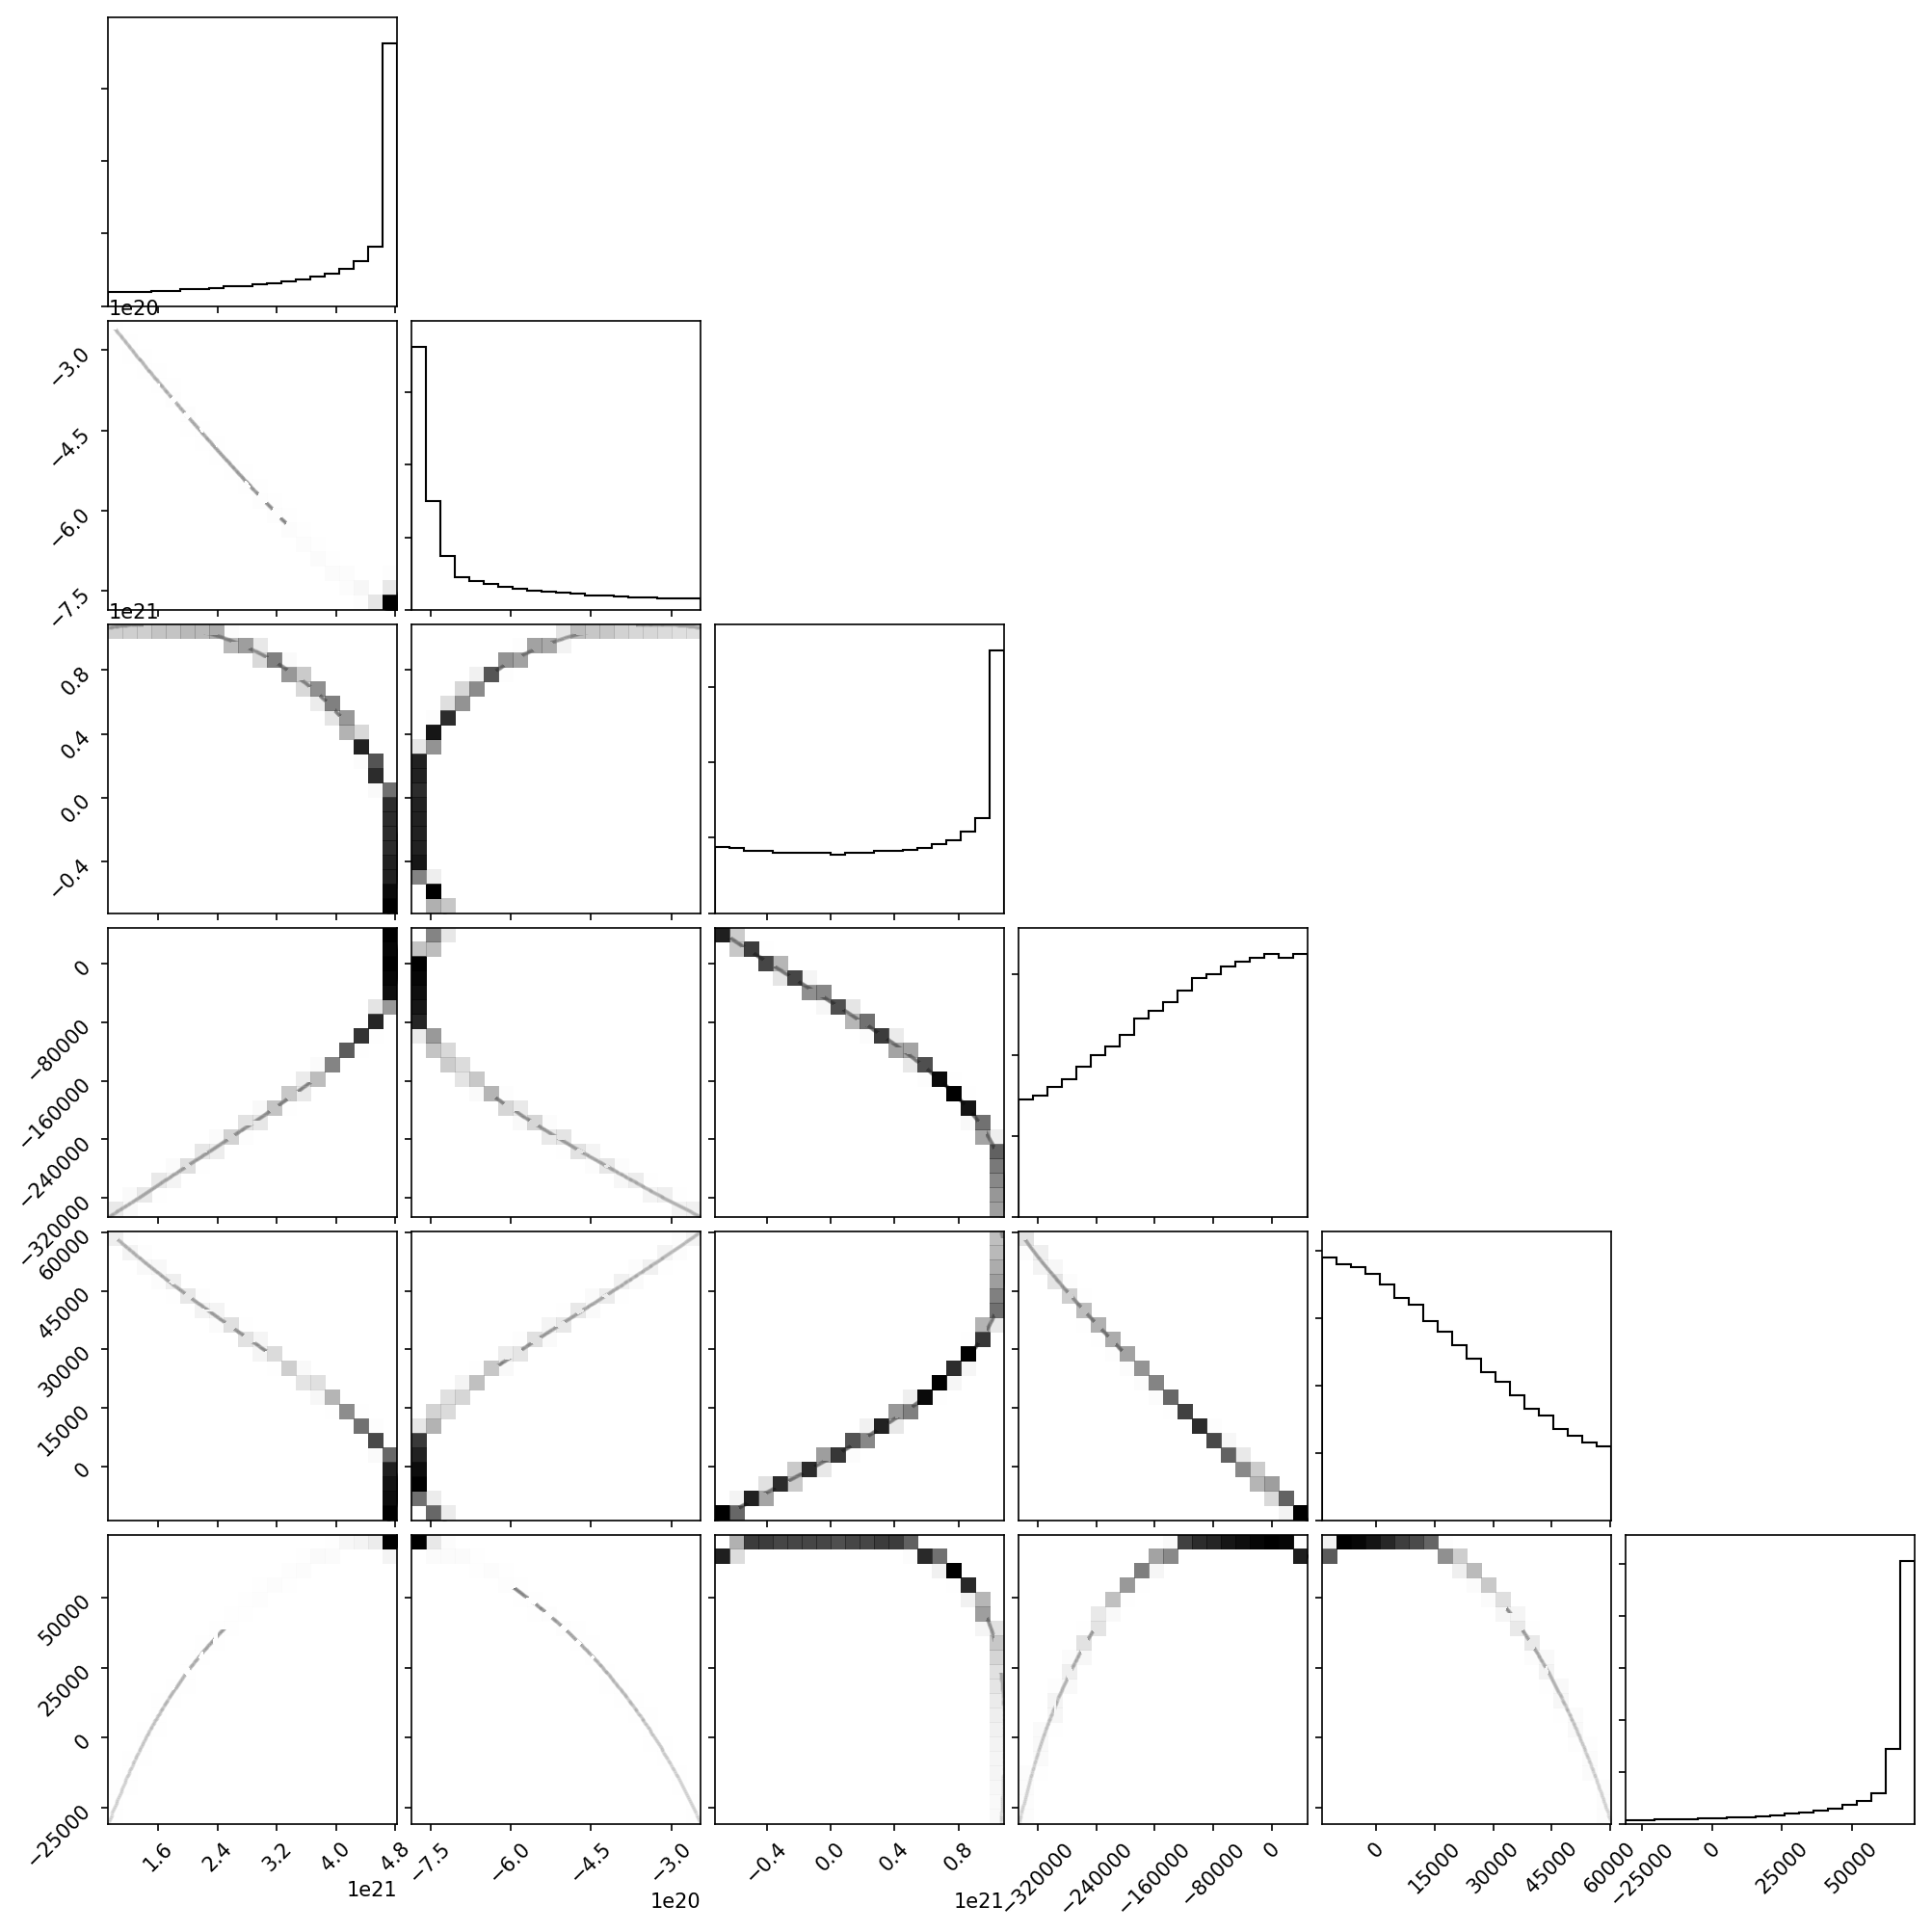

In [8]:
figure = cn.corner(Xs, plot_contours=False)